<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 5> Ingeniería Financiera | ITESO </font> <br> <br>

<center> <font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center> <font color=#154360><font size=7> Proyecto <br> <br> Análisis Fundamental </font> <br> <br>

<center> <font color=#004A94><font size=5> Equipo 2 </font> <br> <br>

<center> <font color=#0091EA><font size=4> I.F. Maria Fernanda Ansoleaga | @iteso.mx </font> <br> <br>
<center> <font color=#0091EA><font size=4> I.F. Lidia Natasha Gamez  | if709031@iteso.mx </font> <br> <br>
<center> <font color=#0091EA><font size=4> I.F. Tamara Martinez | if709156@iteso.mx </font> <br> <br>

# Abstract
Este laboratorio tiene como propósito principal...

## Aspectos Financieros
...

## Aspectos estadísticos

Para poder iniciar con el análisis estadístico se debe observar la gráfica de los valores actuales del indicador. Se van a obtener las características de esta serie de tiempo con el propósito de apoyar la estrategia de inversión que se muestra en este proyecto.

In [5]:
import funciones as fn
import visualizaciones as vn
import pandas as pd
import numpy as np

In [7]:
datos = fn.f_leer_archivo(param_archivo='data2.xlsx')

In [9]:
serie = vn.plot_profit_diario(datos=datos)
serie

A partir de ver esta gráfica se puede inferir que es estacionaria, por la forma que presentan los valores actuales a lo largo del tiempo. En seguida se utilizará la metodología de Box-Jenkins. Esta metodología se aplica a los modelos autorregresivos de media móvil ARMA o a los modelos autorregresivos integrados de media móvil (ARIMA) para encontrar el mejor ajuste de una serie temporal de valores, a fin de que los pronósticos sean más acertados. El primer paso es verificar si la serie de tiempo es estacionaria.

Fuente: https://es.wikipedia.org/wiki/Metodolog%C3%ADa_de_Box-Jenkins

## Estacionariedad
La estacionariedad implica que las propiedades de la serie no varían con respecto al tiempo. En otras palabras significa que su variación (la forma en la que cambia) no cambia en función del tiempo.
Si la serie presenta estacionariedad significa que las características estadisticas de esta son las mismas en el futuro como en el pasado. También no se necesitará usar una serie transformada pues se podrá seguir con los datos originales.

Fuente: https://rpubs.com/Arthurus/492144

Se desea resolver la siguiente prueba de hipótesis
> $H_0$: La serie es estacionaria.

> $H_a$: La serie no es estacionaria.

In [10]:
estacionariedad = fn.f_estacionaria(param_data=datos)
estacionariedad

('p-value = ', 0.33491040981288367, 'La hipótesis nula no se rechaza')

Como el p-value es mayor al alpha que se determinó, este fue de .05, lo que significa que tiene un nivel de significancia del 95%. La hipótesis nula se acepta, lo que quiere decir que los datos son estacionarios. Esto se puede ver en la gráfica, como se mencionó anteriormente. Al ser estacionaria se considera que la media y la varianza son constantes y que se podrá usar la serie original para las siguientes pruebas.

En seguida se obtendrán los componentes de autocorrelación y autocorrelación parcial.

##  Autocorrelación y autocorrelación parcial
La autocorrelación y la autocorrelación parcial son medidas de asociación entre valores de series actuales y pasadas e indican cuáles son los valores de series pasadas más útiles para predecir valores futuros. Con estos datos podrá determinar el orden de los procesos en un modelo ARIMA.
+ **Función de autocorrelación (FAC).** En el retardo k, es la autocorrelación entre los valores de las series que se encuentran a k intervalos de distancia.
+ **Función de autocorrelación parcial (FACP).** En el retardo k, es la autocorrelación entre los valores de las series que se encuentran a k intervalos de distancia, teniendo en cuenta los valores de los intervalos intermedios.


Fuente: https://www.ibm.com/support/knowledgecenter/es/SS3RA7_sub/modeler_mainhelp_client_ddita/components/dt/timeseries_acf_pacf.html

La autocorrelación parcial en el retraso k es la correlación que resulta después de eliminar el efecto de cualquier correlación debido a los términos de la serie en los retrasos más cortos.

Las gráficas de autocorrelación resumen gráficamente la relación entre una observación en una serie de tiempo y una observación en un momento anterior. El eje x del gráfico de FAS indica el retardo en el que se calcula la autocorrelación; el eje y indica el valor de la correlación (entre -1 y 1). 

C:\Users\tamar\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning:

invalid value encountered in sqrt



(<Figure size 864x432 with 3 Axes>,
 <Figure size 864x432 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fc6a49c080>)

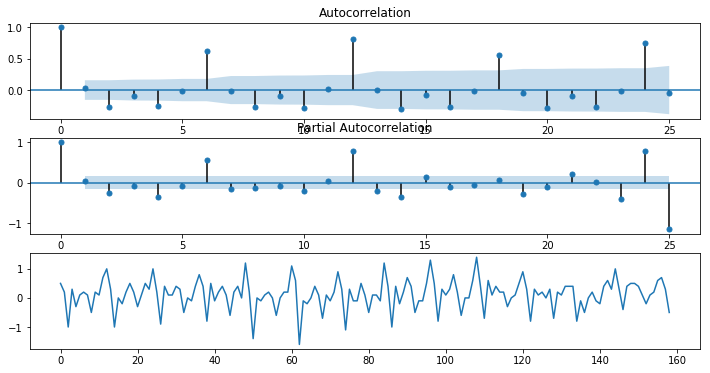

In [14]:
#autocorr = fn.f_autocorrelation(param_data=datos)
pltauto= vn.autocorr(datos)
pltauto

In [2]:
[df_A, df_B, df_C, df_D] = fn.f_clasificacion_ocurrencia(param_data=datos)

/Users/natasha/Documents/Trading/proyecto_equipo_2/funciones.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_data['cons'][i] = param_data['previous'][i]


In [3]:
df_A.shape[0]+df_B.shape[0]+df_C.shape[0]+df_D.shape[0] == datos.shape[0]

True

In [4]:
df_pe = fn.f_precios(param_data=datos)

In [6]:
df_direccion = fn.f_direccion(param_data=df_pe)